In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random
from scipy.optimize import curve_fit
import math
from tqdm import tqdm

In [109]:
M_list = np.loadtxt('M.txt', dtype = float)
M_list = M_list.tolist()

Chi_list = np.loadtxt('chi.txt',dtype = float)
Chi_list = Chi_list.tolist()

E_list = np.loadtxt('E.txt',dtype = float)
E_list = E_list.tolist()

Cv_list = np.loadtxt('cv.txt', dtype = float)
Cv_list = Cv_list.tolist()

S0SR_list = pd.read_hdf("s0sr_data.h5",key = 'data')

In [110]:
S0SR_list

,0,1,2,3,4,5,6,7,8,9,...,986,987,988,989,990,991,992,993,994,995
0,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
1,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",...,"[1, 1, -1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
2,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, -1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, -1]","[1, 1, -1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]"
3,"[1, 1, -1, -1, 1, 1]","[1, 1, -1, -1, 1, 1]","[1, 1, -1, -1, 1, 1]","[1, 1, -1, -1, 1, 1]","[1, 1, -1, -1, 1, 1]","[1, 1, -1, -1, 1, 1]","[1, 1, -1, -1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, 1, -1]","[1, -1, 1, 1, -1, 1]","[1, -1, 1, 1, -1, 1]","[1, 1, -1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, -1, -1, -1, -1]"
4,"[1, 1, -1, -1, -1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, -1, 1, -1, 1]",...,"[1, 1, 1, 1, -1, -1]","[1, -1, 1, -1, -1, -1]","[1, 1, 1, 1, -1, 1]","[1, -1, -1, 1, 1, 1]","[1, -1, -1, -1, 1, -1]","[1, -1, -1, -1, 1, -1]","[1, -1, -1, -1, 1, -1]","[1, -1, -1, 1, 1, 1]","[1, -1, -1, 1, 1, 1]","[1, -1, -1, 1, 1, 1]"
5,"[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, -1, 1, -1, -1, 1]","[1, -1, 1, -1, -1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, -1, -1, -1, -1]","[1, -1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
6,"[1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, -1]","[1, -1, 1, 1, -1, -1]","[1, -1, 1, 1, -1, -1]","[1, 1, 1, 1, -1, -1]","[1, 1, -1, 1, 1, 1]","[1, 1, 1, -1, 1, -1]","[1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, -1, 1]","[1, -1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]"
7,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, -1]","[1, 1, -1, 1, -1, -1]","[1, 1, -1, 1, -1, -1]","[1, 1, -1, 1, -1, -1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, -1, -1, -1, -1, 1]","[1, -1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]"
8,"[1, 1, -1, -1, 1, -1]","[1, 1, -1, -1, 1, -1]","[1, 1, -1, -1, 1, -1]","[1, 1, -1, -1, 1, -1]","[1, 1, -1, -1, 1, -1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, -1, 1, 1, -1]","[1, -1, -1, 1, 1, -1]","[1, -1, -1, 1, 1, -1]",...,"[1, -1, -1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, 1, -1, 

In [111]:
T=[4.0, 5.0, 6.0, 7.0, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.2, 10.0, 11.0, 12.0, 13.0]

## Fit Magetization Function

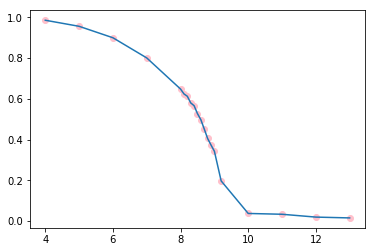

In [112]:
plt.plot(T, M_list,'o',color = 'pink')#color = 'pink'
plt.plot(T, M_list)
plt.show()

In [113]:
def m(T,Tc,A,exponent,b):
    return A*(abs(Tc-T))**(exponent)+b

In [114]:
mag,mag_div = curve_fit(m,T[0:16],M_list[0:16],p0 = np.array([9,0.6,0.75,0.0001]),
                      bounds = ([0,0,0.4,0],[10,np.inf,np.inf,np.inf]),maxfev = 10000)

In [115]:
mag[0],mag[1],mag[-2],mag[-1]

(9.19999994532505, 0.34529164242080707, 0.538639699815908, 0.22777405767720632)

In [116]:
T[14]

9.0

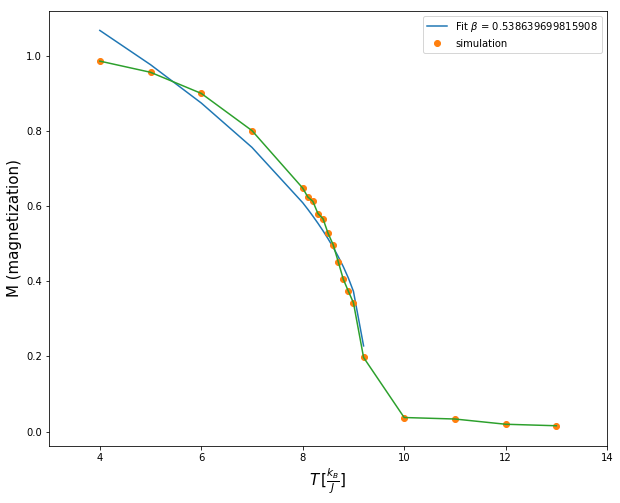

In [347]:
#mag = np.array([7.0, 0.6, 0.5, 0.00001])
plt.figure(figsize=(10,8))
plt.plot(T[0:16], m(np.array(T[0:16]),*mag),label='Fit $\\beta$ = '+str(mag[2]))
plt.plot(T[0:], M_list[0:],'o',label = "simulation")
plt.plot(T[0:], M_list[0:])
plt.xlim(3,14)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel('M (magnetization)',fontsize=15)
plt.legend()
plt.show()

In [207]:
_beta = mag[-2]
_beta

0.538639699815908

In [208]:
_Tc1 = mag[0]
_Tc1

9.19999994532505

# Fit Susceptibility

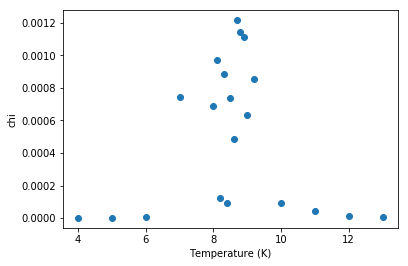

In [209]:
plt.plot(T, Chi_list,'o')#color = 'pink'
#plt.plot(T, Chi_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("chi")
plt.show()

In [121]:
def chi(T,Tc,A,gamma,b):
    return A*(abs(Tc-T))**(-gamma)-b

In [122]:
suscp,suscp_dev = curve_fit(chi,T[0:10],Chi_list[0:10],p0 = np.array([8.7,0,2,0.01]),
                      bounds = ([8,0,1,0],[8.7,np.inf,2,np.inf]),maxfev = 1000000)

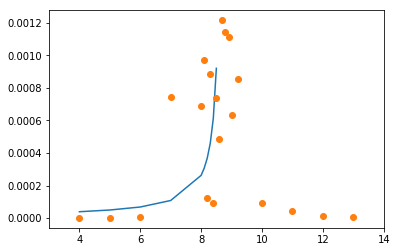

In [123]:
#suscp = np.array([8.3, 0.02786061, 1, 0.01740345])
plt.plot(T[0:10], chi(np.array(T[0:10]),*suscp))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(3,14)
plt.show()

In [124]:
suscp

array([8.69955130e+00, 1.83698835e-04, 1.00001206e+00, 1.36671793e-08])

In [125]:
suscm,suscm_dev = curve_fit(chi,T[15:],Chi_list[15:],p0 = np.array([8.69955130e+00, 1.83698835e-04, 1.00001206e+00, 1.36671793e-08]),
                      bounds = ([8,0,1,0],[8.7,np.inf,1.01,np.inf]),maxfev = 100000)

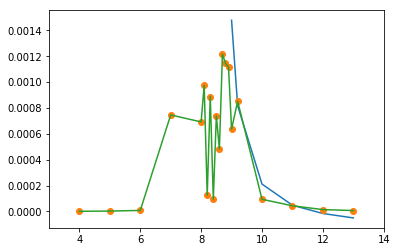

In [350]:
#suscm = np.array([6.2, 1.95163279e-03, 1.00000000e+00, 6.93660749e-04])
plt.plot(T[14:], chi(np.array(T[14:]),*suscm))
plt.plot(T[0:], Chi_list[0:],'o')
plt.plot(T[0:], Chi_list[0:])
plt.xlim(3,14)
plt.show()

In [127]:
suscm

array([8.69999999e+00, 4.85825891e-04, 1.00999985e+00, 1.61404200e-04])

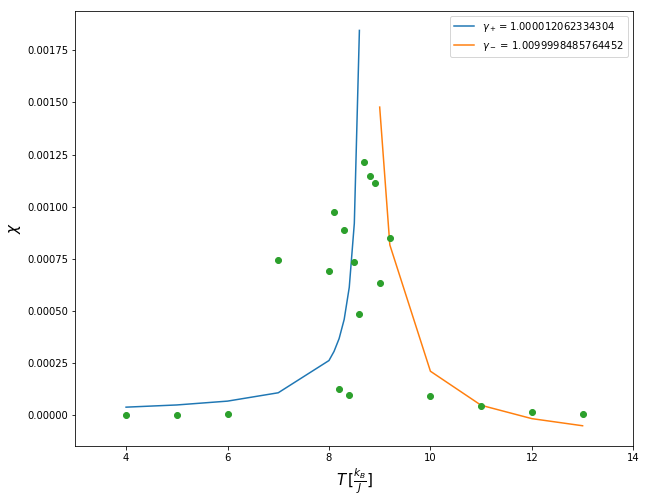

In [210]:
plt.figure(figsize=(10,8))
plt.plot(T[0:11], chi(np.array(T[0:11]),*suscp),label = '$\gamma_+ = $'+str(suscp[-2]))
plt.plot(T[14:], chi(np.array(T[14:]),*suscm),label = '$\gamma_-$ = '+str(suscm[-2]))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(3,14)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$\chi$",fontsize = 15)
plt.legend()
plt.show()

In [129]:
_gammap = suscp[-2]
_gammam = suscm[-2]

_gamma = (_gammap+_gammam)/2
_gamma

1.0050059554553745

In [130]:
_Tc2 = (suscm[0]+suscp[0])/2
_Tc2

8.699775645316961

## Heat Capacity Fit

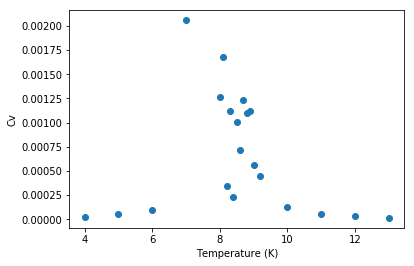

In [131]:
plt.plot(T, Cv_list,'o')#color = 'pink'
#plt.plot(T, Cv_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("Cv")
plt.show()

In [132]:
def cv(T,Tc,A,alpha,b):
    return A*(abs(Tc-T))**(-alpha)-b

In [336]:
heatcap,heatcap_dev = curve_fit(chi,T,Cv_list,p0 = np.array([8.75,0.5,0.0004,0.00001]),
                                bounds = ([0,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf]),maxfev = 100000)

#bounds = ([8.4,0,0,0],[9,np.inf,np.inf,np.inf])

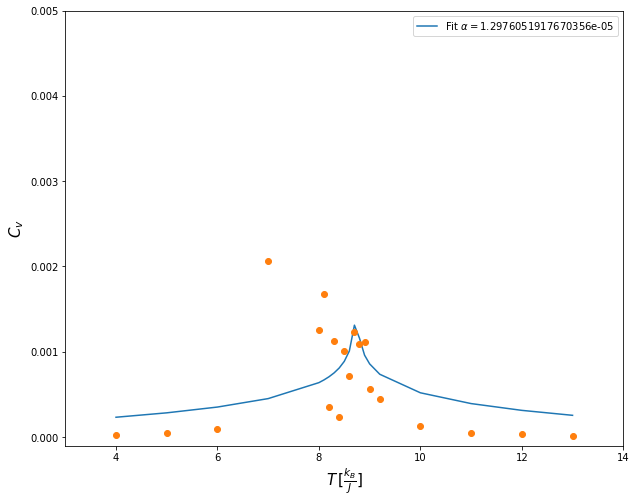

In [346]:
#heatcap=np.array([8.7,0.6,0.0004,0.5996])
plt.figure(figsize=(10,8))
plt.plot(T, cv(np.array(T),*heatcap),label = 'Fit $\\alpha = $'+str(heatcap[-2]))
plt.plot(T[0:], Cv_list[0:],'o')
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$C_v$",fontsize = 15)
plt.xlim(3,14)
plt.ylim(-0.0001,0.005)
plt.legend()
plt.show()

In [338]:
heatcap

array([8.73310937e+00, 1.67695722e+01, 1.29760519e-05, 1.67690022e+01])

In [339]:
_Tc3 = heatcap[0]
_Tc3

8.73310936814403

In [340]:
_alpha = heatcap[-2]
_alpha

1.2976051917670356e-05

In [341]:
Ave_Tc = (_Tc1+_Tc2+_Tc3)/3
Ave_Tc

8.877628319595347

## Fit Correction Function

In [300]:
G_T = []
for t in range(len(T)):
    G = []
    double=0
    single1=0
    single2=0
    for r in range(1,3):
        double = 0
        single1 =0
        single2 =0
        for nstep in range(0,966):
            double+=S0SR_list[nstep][t][r]
            #single1+=S0[n][i]
            #single2+=S0[n][i]
        #G.append(double/len(S0SR)-(single1/len(S0))*(single2/len(SR)))
        G.append(abs(double/(966)))
        
    G_T.append(G)

In [303]:
T[14] # The closed value in our simulation

9.0

In [304]:
def Corr(r,eta):
    return r**(-5+2-eta)

eps,eps_div = curve_fit(Corr,np.array(range(1,3)),np.array(G_T[14]), maxfev = 100000)

# Using nv = gamma/(2-eta)
eta = eps[0]
nv = _gamma/(2-eta)
nv

0.5109946885378616

In [349]:
1/0.1139152

8.778459766563198